In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/XRP-USD-monthly.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,0.006523,0.007160,0.006031,0.006314,0.006314,39156759
2017-02-01,0.006311,0.007833,0.005427,0.005536,0.005536,23637113
2017-03-01,0.005525,0.021776,0.005372,0.020889,0.020889,220573420
2017-04-01,0.021743,0.071441,0.019664,0.051607,0.051607,1109643776
2017-05-01,0.051580,0.435170,0.049317,0.246590,0.246590,5788513336


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2017-01-01,0.006314
2017-02-01,0.005536
2017-03-01,0.020889
2017-04-01,0.051607
2017-05-01,0.246590
2017-06-01,0.262930
2017-07-01,0.167386
2017-08-01,0.255630
2017-09-01,0.197529


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

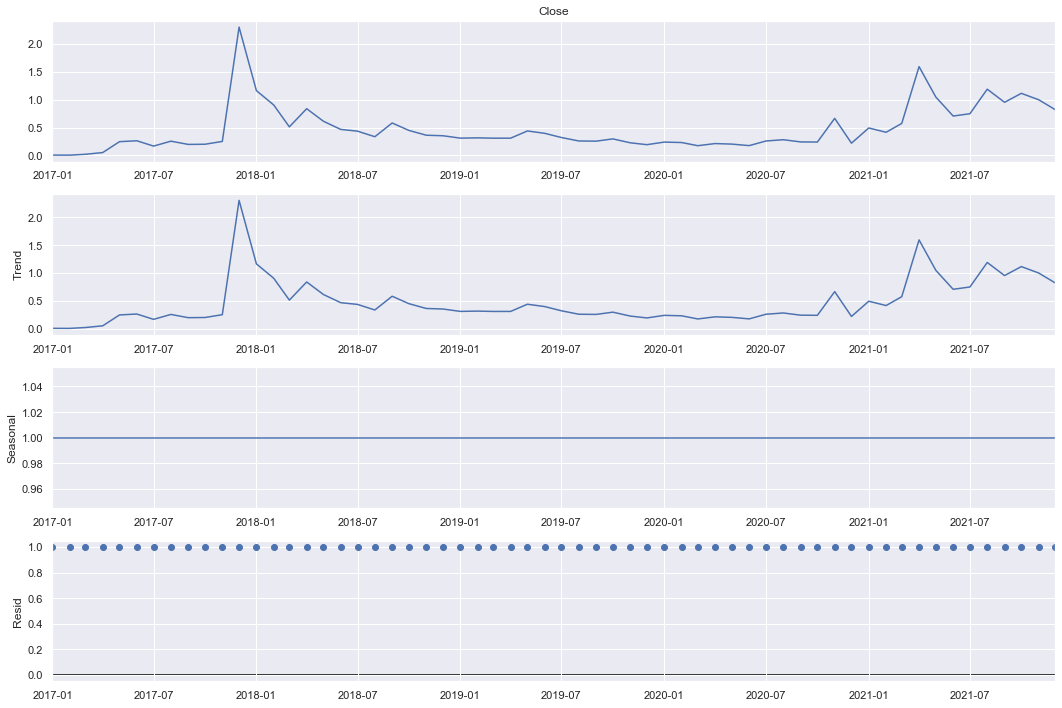

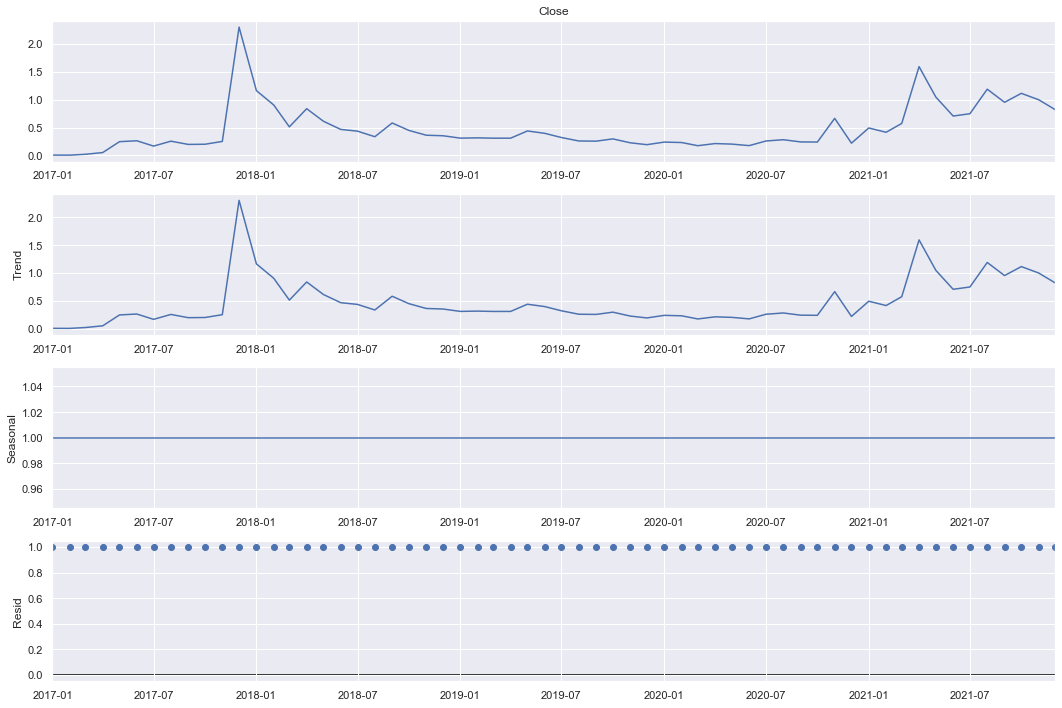

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=57.236, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=81.957, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=57.161, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=66.541, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=82.987, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=56.716, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=57.182, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=59.148, Time=0.17 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=57.163, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=56.800, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=68.422, Time=0.03 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=58.618, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=55.929, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=56.233, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AIC=56.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -24.957
Date:                             Tue, 07 Dec 2021   AIC                             55.914
Time:                                     23:27:12   BIC                             61.528
Sample:                                          0   HQIC                            58.036
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8714      0.140      6.205      0.000       0.596       1.147
ma.L1         -0.3306      0.410     -0.807      0.420      -1.134       0.473
sigma2         0.1627      0.016     10.258      0.000       0.132       0.194
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               443.53
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -2.40
Prob(H) (two-sided):                  0.06   Kurtosis:                        17.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -19.072
Date:                            Tue, 07 Dec 2021   AIC                             48.144
Time:                                    23:27:12   BIC                             55.921
Sample:                                01-01-2017   HQIC                            50.828
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4322      0.334     -1.296      0.195      -1.086       0.221
ar.S.L12      -0.0918      0.082     -1.117      0.264      -0.253       0.069
ar.S.L24       0.1104      1.542      0.072      0.943      -2.913       3.133
ma.S.L12      -0.0971      0.327     -0.297      0.766      -0.737       0.543
sigma2         0.1695      0.053      3.199      0.001       0.066       0.273
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               367.64
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -3.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+17. Standard errors may be unstable.
"""

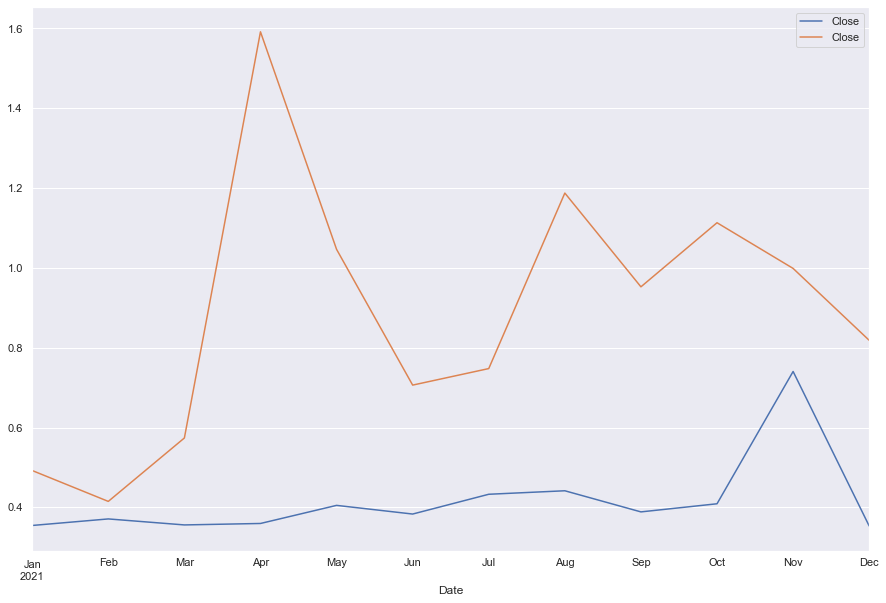

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

0.5668064345794477

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

0.3212695342806657

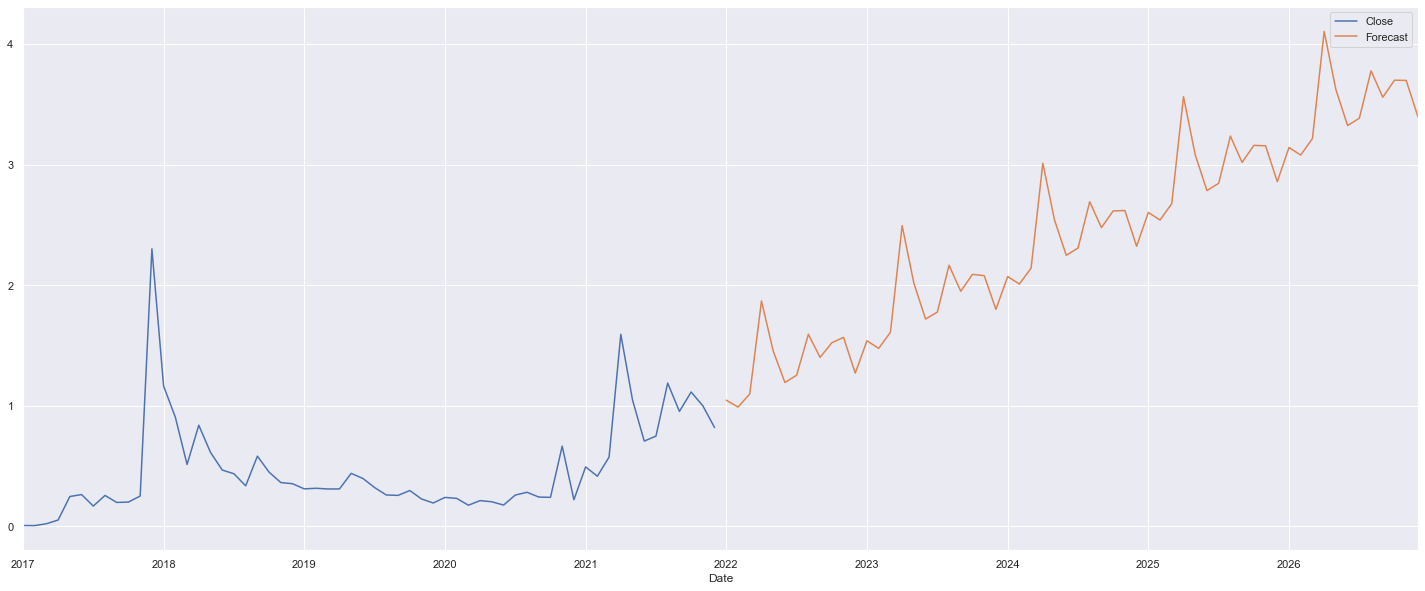

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 20 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 5 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)
